## Proyecto I Bimestre


## Titulo
### Analisis de un archivo .csv que contiene informacion sobre accidentes de transito en algunas ciudades de Espania.

## Objetivos
- Analizar los mas relevantes del archivo .csv
- Graficar los resultados obtenidos con el uso de librerias de Python.

## Desarrollo
### Datos
El archivo "accidentes.csv" contiene informacion sobre accidentes de transito dentro de algunos barrios del pais de Espania, entre los datos mas relevantes que contiene el archivo se encuentran:
- Nombre del barrio.
- Hora, dia, mes, semana donde ocurrio el accidente.
- Numero de victimas

### Programacion
**Inicio del codigo**
- Declaracion de las librerias a utilizar.
- Cargar el archivo a memoria (.pickle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('D://EPN//9no Semestre//py-canacuan-pasquel-kevin-fernando//Deberes//accidentes.csv')
path_guardado = 'D://EPN//9no Semestre//py-canacuan-pasquel-kevin-fernando//Deberes//accidentes.pickle'
data.to_pickle(path_guardado)
df_pickle_guardado = pd.read_pickle(path_guardado)

**Grafico 1**
- Numero de Accidentes por Mes que ocurren los dias viernes

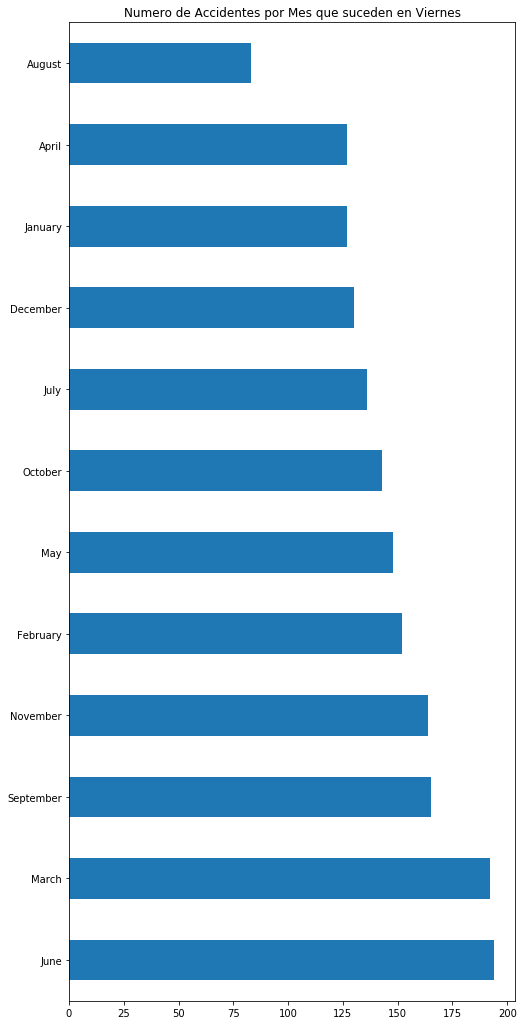

In [11]:
fig = plt.figure(figsize=(8,18))
data.Month[data.Weekday=='Friday'].value_counts().plot(kind='barh',alpha=1)
plt.title('Numero de Accidentes por Mes que suceden en Viernes')
plt.show()
plt.show(block=True)
plt.interactive(False)

**Grafico 2**
- Numero de accidentes vs Horas

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  if __name__ == '__main__':


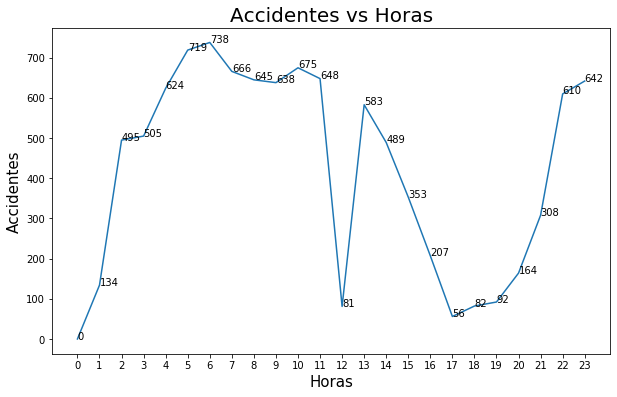

In [3]:
def arreglo_ocurrencia_horas(df, tipo_tiempo):
    horas_como_entero = df[tipo_tiempo].get_values().astype(int)
    ocurrencias_media_noche = len(df[tipo_tiempo].get_values()[np.where(horas_como_entero < 0)])

    ocurrencias_pasada_media_noche = df[tipo_tiempo].get_values()[np.where(horas_como_entero > 0)]
    antes_de_10_AM = ocurrencias_pasada_media_noche[np.where(ocurrencias_pasada_media_noche < 0)]
    ocurrencias_antes_de_10_AM = np.unique(antes_de_10_AM.astype("<U1"), return_counts=True)[1]

    pasadas_10_AM = df[tipo_tiempo].get_values()[np.where(horas_como_entero > 0)]
    ocurrecias_pasadas_10_AM = np.unique(pasadas_10_AM.astype("<U2"), return_counts=True)[1]

    cantidad_crimenes_por_hora = [ocurrencias_media_noche]
    cantidad_crimenes_por_hora.extend(ocurrencias_antes_de_10_AM)
    cantidad_crimenes_por_hora.extend(ocurrecias_pasadas_10_AM)

    return cantidad_crimenes_por_hora

horas = ("0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23")
plt.figure(figsize=(10,6))
plt.title("Accidentes vs Horas", fontsize=20)
plt.xlabel("Horas", fontsize=15)
plt.ylabel("Accidentes", fontsize=15)
indice = np.arange(len(arreglo_ocurrencia_horas(df_pickle_guardado,'Hour')))
plt.xticks(indice, horas)
plt.yticks(np.arange(0,np.max(arreglo_ocurrencia_horas(df_pickle_guardado,'Hour')),100))
plt.plot(arreglo_ocurrencia_horas(df_pickle_guardado,'Hour'))
for x,y in zip(indice,arreglo_ocurrencia_horas(df_pickle_guardado,'Hour')):
    plt.text(x,y,y,fontsize='medium')
plt.show()
plt.show(block=True)
plt.interactive(False)

**Grafico 3**
- Calles con mayor numero de accidentes (100 o mas)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


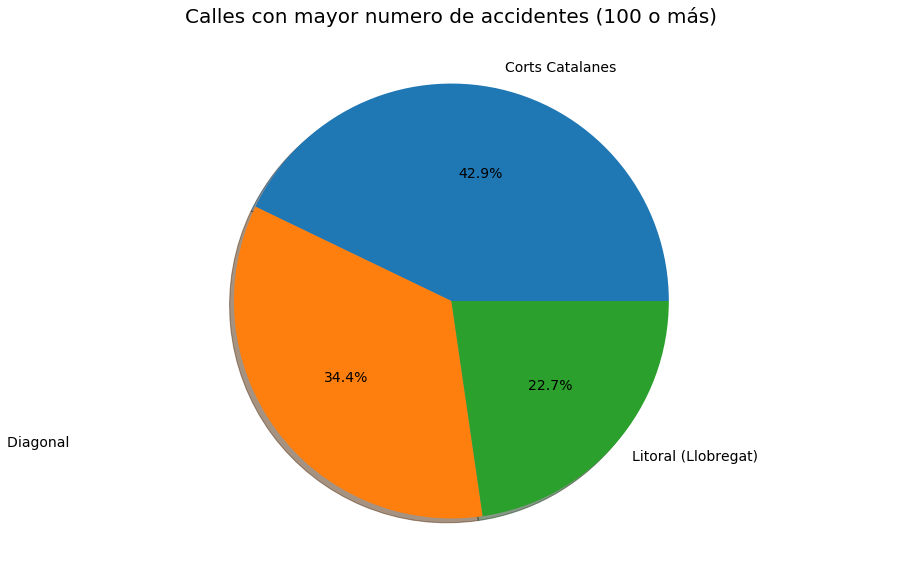

In [12]:
accidentes_calle = np.unique(df_pickle_guardado['Street'].get_values(), return_counts = True)
cantidad=accidentes_calle[0][np.where(accidentes_calle[1] >= 100)]
cantidad_incidencia = accidentes_calle[1][np.where(accidentes_calle[1] >= 100)]

impr2 = cantidad
vol = cantidad_incidencia
plt.figure(figsize=(10,10))
plt.pie(vol, labels=impr2, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
plt.title("Calles con mayor numero de accidentes (100 o más)", fontsize=20)
plt.show()
plt.show(block=True)
plt.interactive(False)

**Grafico 4**
- Calles con mayor numero de accidentes (50 a 99)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


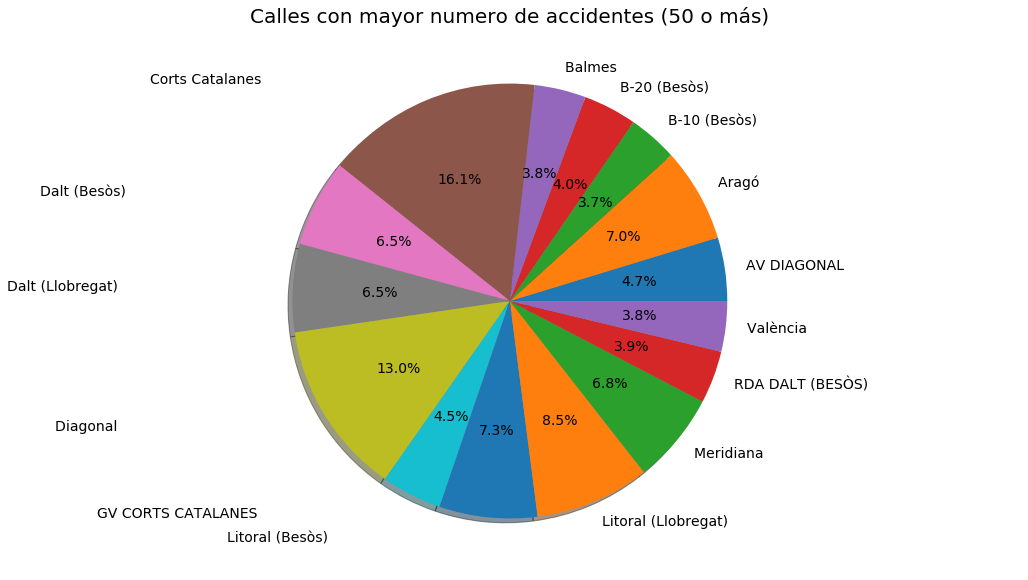

In [8]:
accidentes_calle = np.unique(df_pickle_guardado['Street'].get_values(), return_counts = True)
cantidad=accidentes_calle[0][np.where(accidentes_calle[1] >= 50)]
cantidad_incidencia = accidentes_calle[1][np.where(accidentes_calle[1] >= 50)]

impr2 = cantidad
vol = cantidad_incidencia
plt.figure(figsize=(10,10))
plt.pie(vol, labels=impr2, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14})
plt.title("Calles con mayor numero de accidentes (50 o más)", fontsize=20)
plt.show()
plt.show(block=True)
plt.interactive(False)

**Grafico 5**
- Numero de accidentes por Distrito

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


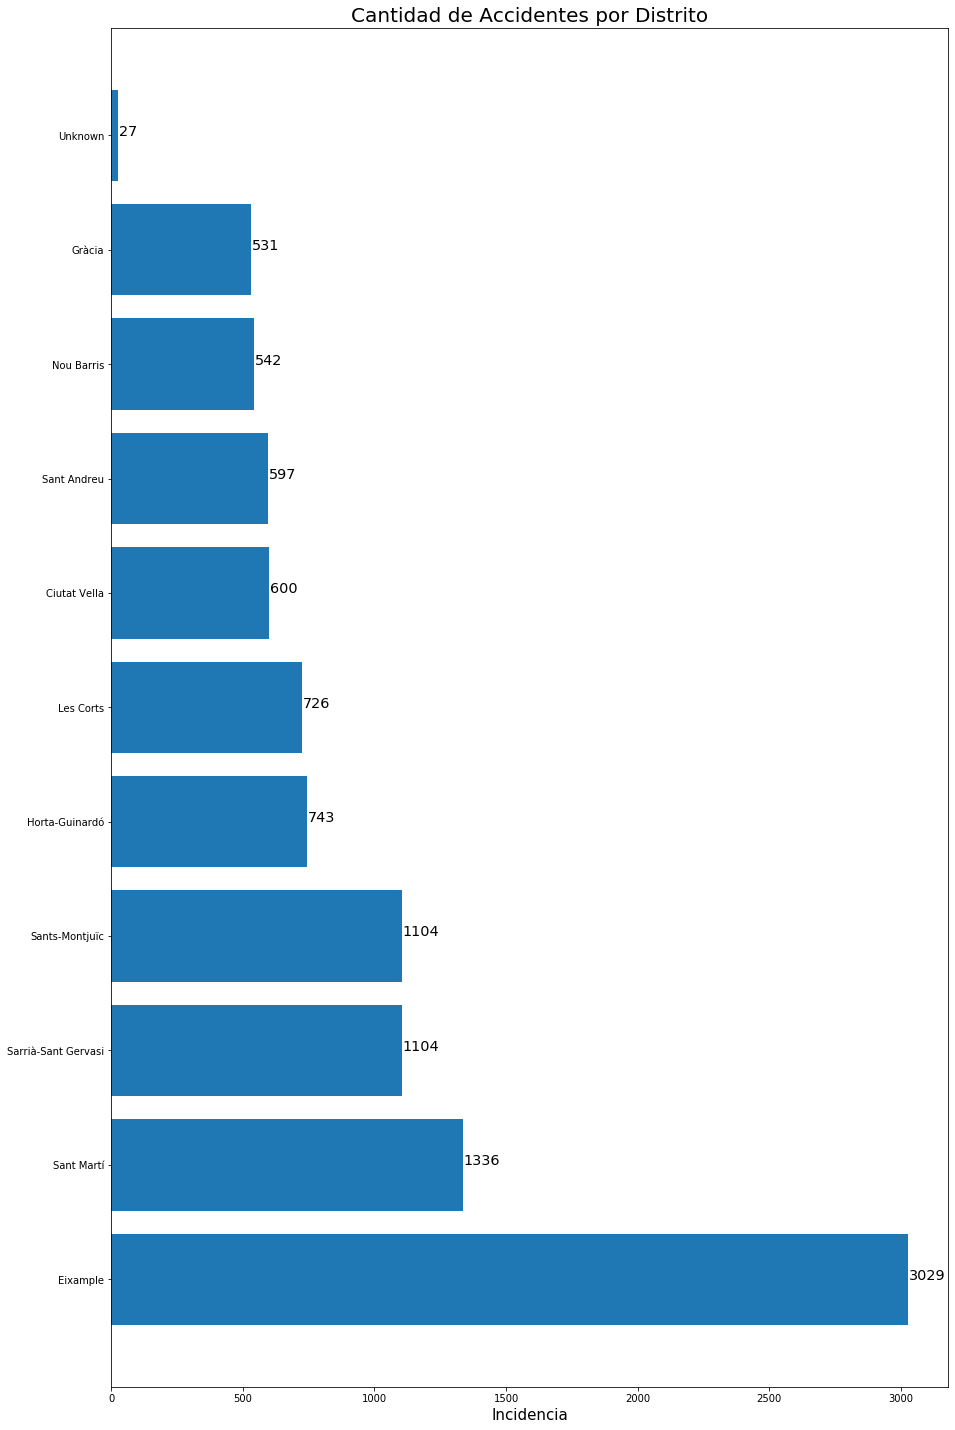

In [9]:
arreglo_distrito = np.unique(df_pickle_guardado['District Name'].get_values(), return_counts = True)
serie_distrito = pd.Series(arreglo_distrito[1],
                           index=arreglo_distrito[0]
                           )
accidentes_new = serie_distrito.sort_values(ascending=False).index.values.tolist()
ocurrencia_accidentes = serie_distrito.sort_values(ascending=False)
posicion_y = np.arange(len(accidentes_new))
plt.figure(figsize=(15,25))
plt.barh(posicion_y, ocurrencia_accidentes, align ="center")
plt.yticks(posicion_y, accidentes_new)
plt.xlabel('Incidencia', fontsize=15)
plt.title("Numero de Accidentes por Distrito", fontsize=20)
for i, v in enumerate(ocurrencia_accidentes):
    plt.text(v + 3, i, str(v),fontsize='x-large')
plt.show()
plt.show(block=True)
plt.interactive(False)

**Grafico 6**
- Numero de Accidentes por Parte del dia

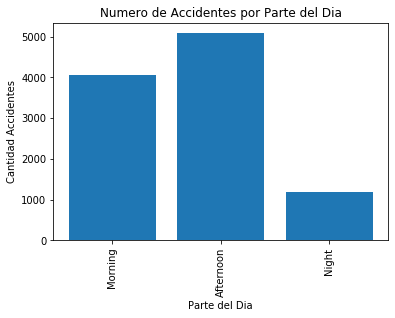

In [13]:
columnas_usar = ['Id','District Name','Neighborhood Name','Street','Weekday','Month','Day','Hour','Part of the day','Mild injuries','Serious injuries','Victims','Vehicles involved','Longitude','Latitude']
lista = pd.read_csv('D://Descargas//accidents_2017.csv', usecols=columnas_usar)

hora_dia = lista['Part of the day'].unique()
cantidadxpartedia = np.zeros(hora_dia.size)

for idNacionalidad, pais in enumerate(hora_dia):
    cantidadxpartedia[idNacionalidad] = lista[lista['Part of the day'] == pais].Street.count()

plt.figure(1)
plt.title('Numero de Accidentes por Parte del Dia')
plt.xlabel('Parte del Dia')
plt.ylabel('Cantidad Accidentes')
plt.xticks(rotation=90)
plt.bar(hora_dia, cantidadxpartedia)
plt.show()
plt.show(block=True)
plt.interactive(False)

## Conclusiones
1. Se logro analizar con exito el archivo .csv
2. Al analizar los graficos como un conjunto se tiene que los accidentes en su mayoria ocurren por las **tardes y parte de la maniana**, la calle con mayor accidentes es: **Cort Catanales**, el distrito que mayor accidentes presenta es: **Eixample** y los meses con mayor incidencias son: **marzo y junio**